### LeNet-5 Architecture

#### Load packages

In [4]:
!pip install keras 

In [ ]:
!pip install tensorflow 

In [2]:
import keras

In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten
import tensorflow as tf 

In [5]:
from matplotlib import pyplot as plt 

In [6]:
from keras.datasets import mnist

In [7]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [9]:
# Reshape and scale the images to be 32x32 and add an extra dimension to represent the single channel (grayscale)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2], [0, 0]], "CONSTANT")
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2], [0, 0]], "CONSTANT")

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


#### Scaling the 8-bit values between 0 to 1

In [11]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### One hot encoding for multi-class 


In [12]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### LeNet-5 Architecture

In [13]:
def LeNet5():
    model = Sequential()

    # C1 Convolutional Layer
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))

    # S2 Pooling Layer
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # C3 Convolutional Layer
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

    # S4 Pooling Layer
    model.add(AveragePooling2D(pool_size=(2, 2)))

    # C5 Fully Connected Convolutional Layer
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))

    # F6 Fully Connected Layer
    model.add(Dense(units=84, activation='relu'))

    # Output Layer with softmax activation
    model.add(Dense(units=10, activation = 'softmax'))

    return model


In [14]:
# Create the LeNet-5 model
lenet5_model = LeNet5()

C:\Users\sanket\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
lenet5_model.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

In [16]:
# Summary of the model
lenet5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
run_hist = lenet5_model.fit(x_train, y_train,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8743 - loss: 0.4280 - val_accuracy: 0.9648 - val_loss: 0.1084
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9769 - loss: 0.0770 - val_accuracy: 0.9861 - val_loss: 0.0433
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9844 - loss: 0.0503 - val_accuracy: 0.9841 - val_loss: 0.0476
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9876 - loss: 0.0390 - val_accuracy: 0.9862 - val_loss: 0.0422
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9902 - loss: 0.0328 - val_accuracy: 0.9888 - val_loss: 0.0366
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9922 - loss: 0.0223 - val_accuracy: 0.9854 - val_loss: 0.0422
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9868 - val_loss: 0.0435
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9946 - loss: 0

In [18]:
test_loss, test_acc = lenet5_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0524
Test accuracy: 0.9898999929428101


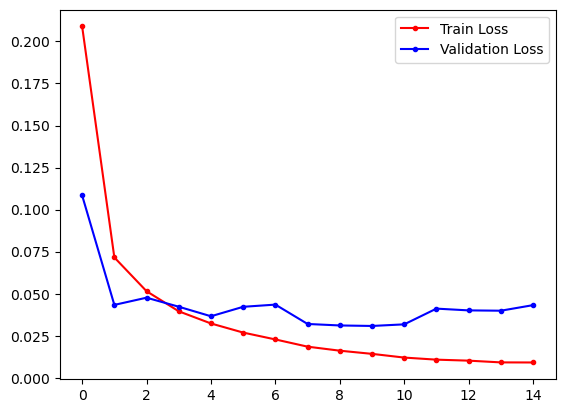

In [19]:
fig, ax = plt.subplots()
ax.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()